# 0.引入所有需要的库和数据集
- 包含word2vec模型、pandas、numpy和gensim
- 其中Gensim是一款开源的第三方Python工具包，用于从原始的非结构化的文本中，无监督地学习到文本隐层的主题向量表达。它支持包括TF-IDF，LSA，LDA，和word2vec在内的多种主题模型算法

In [99]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from gensim.models import Word2Vec
import pandas as pd
import numpy as np
import gensim
import pandas,  numpy, textblob, string #xgboost,
#from keras.preprocessing import text, sequence
#from keras import layers, models, optimizers

In [100]:
import sqlite3
conn = sqlite3.connect("data/database/texts.db")

print ('Opened database successfully')

Opened database successfully


In [101]:
c = conn.cursor()

ci_data=[]
cursor = c.execute("SELECT * from ci order by id asc limit 4000")
#cursor = c.execute("SELECT * from ci order by id")
for row in cursor:
    ci_data.append(row)
#print("读取的词数据样例：")
#print(ci_data[-2:])

poet_data = []
cursor=c.execute("SELECT * FROM poet order by id asc limit 4000")
#cursor = c.execute("SELECT * from poet order by id")
for row in cursor:
    poet_data.append(row)
#print("\n读取的诗数据样例：")
#print(poet_data[-2:])

classical_data = []
cursor=c.execute("SELECT * FROM classical order by id asc limit 4000")
#cursor = c.execute("SELECT * from classical order by id")
for row in cursor:
    classical_data.append(row)
#print("\n读取的文言文数据样例：")
#print(classical_data[-2:])

journal_data = []
cursor=c.execute("SELECT * FROM journal order by id asc limit 4000")
#cursor = c.execute("SELECT * from journal order by id")
for row in cursor:
    journal_data.append(row)
#print("\n读取的期刊数据样例：")
#print(journal_data[:2])
    
news_data = []
cursor=c.execute("SELECT * FROM news order by id asc limit 4000")
#cursor=c.execute("SELECT * FROM news")
for row in cursor:
    news_data.append(row)
#print("\n读取的新闻数据样例：")
#print(news_data[:2])

print("add successfully")

add successfully


In [102]:
data = ci_data + poet_data + classical_data + journal_data + news_data

data_list = []
for line in data:
    data_list.append(list(line))

print(data_list[6000])
for item in data_list:
    item[1] = ' '.join(list(item[1]))
for i in range(len(data_list)):
        data_list[i].remove(data_list[i][3])
        data_list[i].remove(data_list[i][0])
print(data_list[6000])
print(len(data_list))

[40002209, '中兴曾作故人看，抗节唯怜七里滩。 枯枿卧沙疑野艇，丛篁生岸忆长竿。 天边旧迹星辰动，江上余基水石寒。 应笑渭滨周吕望，白头因猎从和銮。 ', 'poet', 'd1fcb4d4-c756-418d-927d-b77c92901a98']
['中 兴 曾 作 故 人 看 ， 抗 节 唯 怜 七 里 滩 。   枯 枿 卧 沙 疑 野 艇 ， 丛 篁 生 岸 忆 长 竿 。   天 边 旧 迹 星 辰 动 ， 江 上 余 基 水 石 寒 。   应 笑 渭 滨 周 吕 望 ， 白 头 因 猎 从 和 銮 。  ', 'poet']
20000


In [103]:
train_data=[]
train_target=[]
for i in range(0,len(data)):
    train_data.append(data[i][1])
    train_target.append(data[i][2])
print(train_data[:3])
print(train_target[15000:15003])

['气和玉烛，睿化著鸿明。 缇管一阳生。 郊盛礼燔柴毕，旋轸凤凰城。 森罗仪卫振华缨。 载路溢欢声。 皇图大业超前古，垂象泰阶平。 岁时丰衍，九土乐升平。 睹寰海澄清。 道高尧舜垂衣治，日月并文明。 嘉禾甘露登歌荐，云物焕祥经。 兢兢惕惕持谦德，未许禅云亭。', '严夜警，铜莲漏迟迟。 清禁肃，森陛戟，羽卫俨皇闱。 角声励，钲鼓攸宜。 金管成雅奏，逐吹逶迤。 荐苍璧，郊祀神祗。 属景运纯禧。 京坻丰衍，群材乐育，诸侯述职，盛德服蛮夷。 殊祥萃，九苞丹凤来仪。 膏露降，和气洽，三秀焕灵芝。 鸿猷播，史册相辉。 张四维。 卜世永固丕基。 敷玄化，荡荡无为。 合尧舜文思。 混并寰宇，休牛归马，销金偃革，蹈咏庆昌期。', '承宝运，驯致隆平。 鸿庆被寰瀛。 时清俗阜，治定功成。 遐迩咏由庚。 严郊祀，文物声明。 会天正、星拱奏严更。 布羽仪簪缨。 宸心虔洁，明德播惟馨。 动苍冥。 神降享精诚。 燔柴半，万乘移天仗，肃銮辂旋衡。 千官云拥，群后葵倾。 玉帛旅明庭。 韶荐，金奏谐声。 集休亨。 皇泽浃黎庶，普率洽恩荣。 仰钦元后，睿圣贯三灵。 万邦宁。 景贶福千龄。']
['modern', 'modern', 'modern']


In [104]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_data, train_target,test_size=0.3,random_state=0) 

# 2. 数据预处理与格式转化
### （1）构建标签字典
> 标签种类总数为36种，共有52w多个标签

- *list(set())*的功能是:对原列表去重并按从小到大排序。
- labels中存放的是所有的样本，而去重后的labels_type中存放的是词性的所有种类

In [105]:
labels = y_train + y_test
labels_types = list(set(labels))

print(labels_types[:10])
print(labels[:10])
print(len(labels))
print(len(labels_types))

['classical', 'poet', 'ci', 'modern']
['classical', 'classical', 'classical', 'modern', 'modern', 'modern', 'modern', 'ci', 'classical', 'modern']
20000
4


> 构建字典
- update()函数用于将两个字典合并操作，有相同的就覆盖，在此处只是把每个类别和对应出现的次数进行统计

In [106]:
labels_dict = {}
labels_index = {"padded_label" : 0}

for index in range(len(labels_types)):
    label = labels_types[index]
    labels_dict.update({label: labels.count(label)})
    labels_index.update({label: index+1})

np.save('y_labels_index.npy', labels_index)     
print("the count of total labels is : "+ str(len(labels)) + "\nthe number of types of labels is : " + str(len(labels_dict)))

the count of total labels is : 20000
the number of types of labels is : 4


- 输出字典（键：类别；值：出现次数）

In [107]:
def print_inventory(dct):
    print("Items held")
    for item, amount in dct.items():
        print("{:<4}:{}".format(item, amount))

print("Here are the specific types and correspond counts: ")
print_inventory(labels_dict)

Here are the specific types and correspond counts: 
Items held
classical:4000
poet:4000
ci  :4000
modern:8000


---
### （2）切分句子
- 因为要考虑词与词之间的关系，因此要把文本切分成句子

> 在文档中的每个句子之间以空格进行分隔，因此可以根据分辨出的空行来分隔每句话

In [108]:
# 按句对X、y进行拆分
def split_corpus_by_sentence(content):
    cleaned_sentence = []
    split_label=len(content)*[""]
    for i in range(len(content)):
        split_label[i]=len(content[i])
    print(split_label)
    #split_label = len(content)
    last_split_index = 0
    index = 0
    while index < len(content):
        current_word = content[index]
        if split_label[index] == 0 and len(cleaned_sentence) == 0:
            cleaned_sentence.append(np.array(content[last_split_index:index]))
            last_split_index = index + 1
            index += 1
        elif split_label[index] == 0  and len(cleaned_sentence) > 0:
            cleaned_sentence.append(np.array(content[last_split_index:index]))
            last_split_index = index + 1
            index += 1
        else:
            index += 1
    return cleaned_sentence

x_train_sent_split = split_corpus_by_sentence(x_train)
y_train_sent_split = split_corpus_by_sentence(y_train)
x_test_sent_split = split_corpus_by_sentence(x_test)
y_test_sent_split = split_corpus_by_sentence(y_test)

print('以句子进行拆分后的句子为：\n', x_train_sent_split[:2])
print('以句子进行拆分后的句子所对应的词性为：\n', y_train_sent_split[:2])

[307, 79, 187, 225, 384, 143, 79, 61, 161, 296, 1137, 40, 1778, 42, 42, 45, 49, 66, 698, 23, 817, 82, 52, 99, 52, 131, 75, 61, 98, 26, 136, 1011, 39, 68, 1434, 39, 886, 156, 52, 269, 425, 83, 43, 405, 31, 34, 31, 23, 143, 94, 34, 98, 369, 68, 114, 69, 86, 106, 31, 54, 34, 1493, 126, 487, 23, 68, 55, 969, 1045, 52, 125, 337, 57, 233, 52, 130, 139, 65, 26, 868, 34, 68, 314, 62, 75, 34, 138, 34, 40, 31, 106, 134, 82, 383, 90, 132, 41, 68, 68, 34, 65, 26, 52, 119, 721, 61, 82, 96, 749, 22, 52, 100, 767, 81, 69, 1025, 69, 27, 558, 78, 43, 118, 165, 41, 68, 61, 82, 32, 133, 337, 96, 81, 871, 99, 72, 709, 68, 113, 144, 29, 115, 168, 45, 104, 61, 111, 68, 68, 82, 34, 68, 52, 26, 28, 76, 22, 63, 68, 651, 41, 579, 132, 112, 63, 98, 104, 358, 23, 109, 57, 42, 68, 80, 34, 61, 139, 192, 39, 68, 34, 363, 34, 83, 38, 48, 38, 96, 819, 299, 82, 109, 54, 87, 117, 264, 82, 41, 21, 50, 23, 28, 360, 34, 52, 967, 141, 32, 48, 89, 21, 68, 129, 34, 62, 57, 969, 99, 75, 164, 231, 58, 108, 52, 58, 236, 157, 23,

- 进行数据集的拆分，并给出一些句子的词性标注的demo

> 转化成计算机语言，因此要转换成索引（数字表示类别）

- 可以看到类别由前面的string值按照排序后的index值转变成了数字表示

In [109]:
def transfer_label_category_index(origin_labels, labels_types):
    transfered_label = []
    for sentence_labels in origin_labels:
        labels_format_index = [labels_types.index(sentence_labels)]  # 将标签依据字典转化为序号
        transfered_label.append(labels_format_index)
    return transfered_label

y_train_index = transfer_label_category_index(y_train, labels_types)
y_test_index = transfer_label_category_index(y_test, labels_types)

print(y_train_index[:5])

[[0], [0], [0], [3], [3]]


---
### （3）设置定长向量
- 循环神经网络中处理的是定长向量的问题，因此要限定句子的长度
- 本次实验中设置每句长度为100个词，不满100个词的句子剩余部分全填充为0，因此在此处可以把y标签填充到100个词（不满100的话全部填充为0），保证传入的是一个定长向量因此可以进行矩阵计算
---
### （4）构建张量
- np.zeros()：构建全0的张量
> ***三个维度的张量：***
1. 标签的样本数（句子数）
2. 句子的长度（本例中设定的是100）
3. 标签的类别数（36个种类）

> 因此在此处转换成的是三维数组，最低维的代表词性的种类，每个元素是一个词，用这个办法可以把所有y_label转成三维数组表示。
第二个维度表示一个句子中包含的词，第三个维度代表所有句子

> 在此增加了一个标签种类，总的类数增加到37，加的是一个特殊的类，用来表示长度超出100后被略掉的词

---
- 填充张量：判断对应的词性并把相应的位置由0替换成1

In [129]:
MAX_SEQUENCE_LENGTH = 500  #设置每句长度为500个词，不满的全填充为0

# 标签格式转化
# 构建对应（标签样本数，句子长度，标签类别数（37类）形状的张量，值全为0
y_train_index_padded = np.zeros((len(y_train_index), MAX_SEQUENCE_LENGTH, len(labels_types)+1), dtype='float', order='C')
y_test_index_padded = np.zeros((len(y_test_index), MAX_SEQUENCE_LENGTH, len(labels_types)+1), dtype='float', order='C')

# 填充张量
for sentence_labels_index in range(len(y_train_index)):
    for label_index in range(len(y_train_index[sentence_labels_index])):
        if label_index < MAX_SEQUENCE_LENGTH:
            y_train_index_padded[sentence_labels_index, label_index, y_train_index[sentence_labels_index][label_index]+1] = 1
            
    if len(y_train_index[sentence_labels_index]) < MAX_SEQUENCE_LENGTH:
        for label_index in range(len(y_train_index[sentence_labels_index]), MAX_SEQUENCE_LENGTH):
            y_train_index_padded[sentence_labels_index, label_index, 0] = 1

for sentence_labels_index in range(len(y_test_index)):
    for label_index in range(len(y_test_index[sentence_labels_index])):
        if label_index < MAX_SEQUENCE_LENGTH:
            y_test_index_padded[sentence_labels_index, label_index, y_test_index[sentence_labels_index][label_index]+1] = 1
            
    if len(y_test_index[sentence_labels_index]) < MAX_SEQUENCE_LENGTH:
        for label_index in range(len(y_test_index[sentence_labels_index]), MAX_SEQUENCE_LENGTH):
            y_test_index_padded[sentence_labels_index, label_index, 0] = 1

print(y_train_index_padded[2])

[[0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


### 将y_train更改为一维向量，并转换为tensor类型

In [111]:
print(y_train[0])
for i in range(len(y_train)):
    if y_train[i] =="modern":
        y_train[i]=0
    elif y_train[i] =="ci":
        y_train[i]=1
    elif y_train[i] =="poet":
        y_train[i]=2
    elif y_train[i] =="classical":
        y_train[i]=3
print(type(y_train[0]))
train_y=torch.tensor(y_train)
print(type(train_y[0]))

classical
<class 'int'>
<class 'torch.Tensor'>


In [113]:
print(y_test[0])
for i in range(len(y_test)):
    if y_test[i] =="modern":
        y_test[i]=0
    elif y_test[i] =="ci":
        y_test[i]=1
    elif y_test[i] =="poet":
        y_test[i]=2
    elif y_test[i] =="classical":
        y_test[i]=3
print(type(y_test[0]))
test_y=torch.tensor(y_test)
print(type(test_y[0]))

modern
<class 'int'>
<class 'torch.Tensor'>


# 3、word2vec模型导入
### 目的：进入对x的处理

> 导入word2vec的原因：word2vec本身具有词典，与语料库的词典进行对应为后续实验做简化

- 预训练的word2vec模型采用前人用中文维基百科训练好的模型

[word2vec模型链接](https://github.com/Embedding/Chinese-Word-Vectors)

- 模型以二进制存储，因此要用特殊的形式读入（load方式）

In [15]:
## 1 导入 预训练的词向量
myPath = 'data/sgns.wiki.char.bz2' # 本地词向量的地址
Word2VecModel = gensim.models.KeyedVectors.load_word2vec_format(myPath).wv # 读取词向量，以二进制读取

vector = Word2VecModel.wv['空间']  # 词语的向量，是numpy格式

C:\ana\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ana\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """


In [16]:
print(type(Word2VecModel.wv)) # 结果为：Word2VecKeyedVectors

for i,j in Word2VecModel.wv.vocab.items():
    print(i) # 此时 i 代表每个单词
    print(j) # j 代表封装了 词频 等信息的 gensim“Vocab”对象，例子：Vocab(count:1481, index:38, sample_int:3701260191)
    break

<class 'gensim.models.keyedvectors.Word2VecKeyedVectors'>
，
Vocab(count:352221, index:0)


C:\ana\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
C:\ana\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
## 2 构造包含所有词语的 list，以及初始化 “词语-序号”字典 和 “词向量”矩阵
vocab_list = [word for word, Vocab in Word2VecModel.wv.vocab.items()]# 存储 所有的 词语

word_index = {" ": 0}# 初始化 `[word : token]` ，后期 tokenize 语料库就是用该词典。
word_vector = {} # 初始化`[word : vector]`字典

# 初始化存储所有向量的大矩阵，留意其中多一位（首行），词向量全为 0，用于 padding补零。
# 行数 为 所有单词数+1 比如 10000+1 ； 列数为 词向量“维度”比如100。
embeddings_matrix = np.zeros((len(vocab_list) + 1, Word2VecModel.vector_size))

C:\ana\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


In [130]:
## 3 填充 上述 的字典 和 大矩阵
for i in range(len(vocab_list)):
    # print(i)
    word = vocab_list[i]  # 每个词语
    word_index[word] = i + 1 # 词语：序号
    word_vector[word] = Word2VecModel.wv[word] # 词语：词向量
    embeddings_matrix[i + 1] = Word2VecModel.wv[word]  # 词向量矩阵
    
np.save('x_word_index.npy', word_index)

C:\ana\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
C:\ana\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  import sys


> 之后需要对语料库数据进行转换：
- 1、文本转化成序号（利用word_index），替换过后的x的表示可以通过序号可以找到对应的向量

In [131]:
from keras.preprocessing import sequence
# 序号化 文本，tokenizer句子，并返回每个句子所对应的词语索引

# 由于将词语转化为索引的word_index需要与词向量模型对齐，故在导入词向量模型后再将X进行处理
def tokenizer(texts, word_index):
    data = []
    for sentence in texts:
        new_sentence = []
        for word in sentence:
            try:
                new_sentence.append(word_index[word])  # 把文本中的 词语转化为index
            except:
                new_sentence.append(0)
            
        data.append(new_sentence)
    # 使用kears的内置函数padding对齐句子,好处是输出numpy数组，不用自己转化了
    data = sequence.pad_sequences(data, maxlen = MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
    
    return data

x_train_tokenized = tokenizer(x_train, word_index)
x_test_tokenized = tokenizer(x_test, word_index)

print(x_train_tokenized[:1])

[[  5737     21   2746   1201   1716   1125      1   2031   7813   2311
   18043      1     41   1893   4325   1345  13031     64   2763   4839
       1  13152     25  47854  19271      3   5549      7     10   1893
     119  16660      1   9050   5006     25   4325     64      3    638
    1874     25   2225  12191      1   1890   6725     19   1058      1
    9265  40160   7430   9976      1     66    211     41   1201   8767
     678      1   9467     31   9642     64      3   2311    678   4280
   23928   1582   9180      1   7134   1305   1377   2038      3   1760
    2688   2292   9180      1  60225  12863   7272   2926      3  53202
    6649  68365   6288      1   5255  18043  12384   1878      3     62
      28   5073      4  26704      1  57827  12863   1878   4259      1
   49135     28   4865      4  21387      1  10954  12863   9381      4
    5305      3 109326   1985  11723   1003   2926   2926 148519      1
   16163   1156   6971     64   1345      1   6284   7272  44429

In [132]:
for i in range (len(x_train_tokenized)):
    x_train_tokenized[i]=torch.tensor(x_train_tokenized[i])
    #print(type(x_train_tokenized[i]))
x_train_tokenize=torch.tensor(x_train_tokenized)
print(type(x_train_tokenize[0]))

<class 'torch.Tensor'>


In [133]:
for i in range (len(x_test_tokenized)):
    x_test_tokenized[i]=torch.tensor(x_test_tokenized[i])
    #print(type(x_train_tokenized[i]))
x_test_tokenize=torch.tensor(x_test_tokenized)
print(type(x_test_tokenize[0]))

<class 'torch.Tensor'>


In [190]:
from torch.utils.data import Dataset,DataLoader
from torch import optim
class Dataset(Dataset):
    def __init__(self,x,y):
        self.x = x.unsqueeze(dim=1)
        self.y = y
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self,idx):
        return self.x[idx],self.y[idx]
train_DL = DataLoader(Dataset(x_train_tokenize,train_y.long()),batch_size=10,shuffle=True)
test_DL=DataLoader(Dataset(x_test_tokenize,test_y.long()),batch_size=10,shuffle=True)

### 模型设置与训练

In [206]:
model=nn.Sequential(nn.Linear(500,100),
                   nn.ReLU(),
                   nn.Linear(100,64),
                   nn.ReLU(),
                   nn.Linear(64,4),
                   nn.LogSoftmax(dim=1))

criterion=nn.NLLLoss()

optimizer=optim.SGD(model.parameters(),lr=0.005)
epochs=5
for e in range(epochs):
    running_loss=0    #初始化损失
    correct = 0
    for words, labels in train_DL:
        optimizer.zero_grad()  # 梯度置0
        #print(words.size())
        words=words.view(words.shape[0],500)
        #print(words.size())
        output=model.forward(words.float())
        loss=criterion(output,labels)
        optimizer.step()
        running_loss+=loss.item()   #累加损失
        #print(running_loss)
        predicted = torch.max(output.data,1)[1]
        #print(predicted)
        correct += (predicted == labels).sum()

        
    else:  #打印平均损失结果
        print(f"第{e}代，训练损失:{running_loss/len(train_DL)},准确率{correct*100/14000}%")   
print("======= Training Finished ! =========")
    
    

第0代，训练损失:1098.0268157904488,准确率36.099998474121094%
第1代，训练损失:1098.02681856496,准确率36.099998474121094%
第2代，训练损失:1098.0268158176966,准确率36.099998474121094%
第3代，训练损失:1098.0268138449533,准确率36.099998474121094%
第4代，训练损失:1098.0268149784633,准确率36.099998474121094%
======= Training Finished ! =========


In [128]:
model

Sequential(
  (0): Linear(in_features=100, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=4, bias=True)
  (5): LogSoftmax(dim=1)
)

In [218]:
import numpy as np

images,labels=next(iter(train_DL))
img=images[0].view(1,500)
with torch.no_grad():
    logits=model.forward(img.float())
result=torch.softmax(logits,dim=1)
result=result.data.numpy().squeeze()
print(result)

[0. 0. 1. 0.]


### 失败的RNN尝试

In [186]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)

        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input):
        combined = torch.cat(input, 1)
        #hidden = self.i2h(combined)
        output = self.i2o(combined)

        output = self.softmax(output)
        return output, hidden

    # 初始化第一个隐藏层输入
    def initHidden(self):
        return Variable(torch.zeros(1, self.hidden_size))

In [187]:
USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
class Model:
    def __init__(self,vocab_size, epoches=100):
        
        hidden_dim = 128
        
        output_dim = 4
        self.model = RNN(vocab_size, hidden_dim , output_dim)
        self.model.to(device)
        self.epoches = epoches

    def train(self,x_train,y_train):
        loss_func = nn.CrossEntropyLoss().cuda()
        optimizer = torch.optim.RMSprop(self.model.parameters(), lr=0.0003)

        for epoch in range(self.epoches):
            total_loss = 0
            for i in range(len(y_train)):
                x , y = x_train[i],y_train[i]
                #embeding = nn.Embedding(len(vocab_list),300)
                #x_tensor = torch.tensor([x], dtype=torch.long,device=device)
                
                #y_tensor = torch.tensor([y], dtype=torch.long, device=device)

                optimizer.zero_grad()
                hidden_dim = 128
                hidden = Variable(torch.zeros(1, hidden_dim))
                #output= self.forward(words.float(),hidden)
                pred = self.model(x) # [batch, out_dim]
                loss = loss_func(pred, y)
                loss.backward()
                total_loss += loss
                optimizer.step()
            print("Training: in epoch {} loss {}".format(epoch, total_loss/1000))

    def evaluate(self,x_dev,y_dev):
        with torch.no_grad(): # 评估时不进行梯度计算
            correct = 0
            for i in range(len(y_dev)):
                x , y = x_dev[i],y_dev[i] 
                # x_tensor = torch.tensor([x], dtype=torch.long,device=device)
                x_tensor = embeds(x)
                
                pred = self.model(x_tensor)
                if torch.argmax(pred).item() == y:
                    correct += 1

            print('Evaluating: test accuracy is {}%'.format(correct*100/len(y_dev)))

In [188]:
model = Model(len(vocab_list),10)
model.train(x_train_tokenize,train_y)
#model.evaluate(x_dev_vectorized,y_dev_encoded)

TypeError: cat() received an invalid combination of arguments - got (Tensor, int), but expected one of:
 * (tuple of Tensors tensors, name dim, *, Tensor out)
 * (tuple of Tensors tensors, int dim, *, Tensor out)


In [219]:
class RNN(nn.Module):
    #overload __init__() method
    def __init__(self):
        super(RNN, self).__init__()
        
        self.rnn = nn.LSTM(
            input_size=500,
            hidden_size=64,
            num_layers=1,
            batch_first=True,
        )
        self.out = nn.Linear(64,4)
        
    #overload forward() method
    def forward(self, x):
        r_out, (h_n, h_c) = self.rnn(x, None)
        out = self.out(r_out[: ,-1, :])
        return out
rnn = RNN()
print(rnn)

RNN(
  (rnn): LSTM(500, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=4, bias=True)
)


In [213]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)
#define cross entropy loss function
loss_func = nn.CrossEntropyLoss()

In [233]:
for epoch in range(EPOCH):
    for words,labels in train_DL:
        #recover x as (batch,time_step,input_size)
        #print(b_x[0])
        print(words.size())
        words=words.reshape(words.shape[0],words.shape[1],500)
        print(words.size())
        #b_x = b_x.view(1, 10, 500).long()
        #b_x = b_x.view(1, -1)[0].type(torch.LongTensor)
        #print(words[0])
        word=words.int()
        #print(word[0])
        #print(type(b_x))
        #print(b_x)
        output = rnn(word)
        #print(rnn(b_x.long()))
        #print(output[1])
        loss = loss_func(output,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step % 50 == 0:
            #train with rnn
            test_output = rnn(test_x)
            #loss function
            pred_y = torch.max(test_output, 1)[1].data.numpy()
            #accuracy calculate
            acc = float((pred_y == test_y).astype(int).sum()) / float(test_y.size)
            print('Epoch: ', (epoch), 'train loss: %.3f'%loss.data.numpy(), 'test acc: %.3f'%(acc))

torch.Size([10, 1, 500])
torch.Size([10, 1, 500])


RuntimeError: expected scalar type Int but found Float

In [125]:
# print 100 predictions from test data
numTest = 100
test_output = rnn(test_x[:numTest])
pred_y = torch.max(test_output, 1)[1].data.numpy()
print(pred_y, 'prediction number')
print(test_y[:numTest], 'real number')
ErrorCount = 0.0
for i in pred_y:
	if pred_y[i] != test_y[i]:
		ErrorCount += 1
print('ErrorRate : %.3f'%(ErrorCount / numTest))

RuntimeError: input must have 3 dimensions, got 2

# 5、可视化训练信息

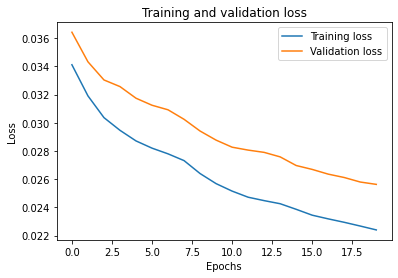

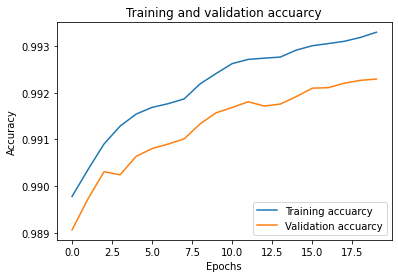

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'], label='Training loss')
    plt.plot(network_history.history['val_loss'], label='Validation loss')
    plt.legend()
    plt.title('Training and validation loss')
    

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['acc'], label='Training accuarcy')
    plt.plot(network_history.history['val_acc'], label='Validation accuarcy')
    plt.legend( loc='lower right')
    plt.title('Training and validation accuarcy')
    plt.show()

plot_history(att2)

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 300)          105666600 
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 128)          219648    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 128)          0         
_________________________________________________________________
dense_1 (Dense)              (None, 100, 64)           8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 64)           0         
_________________________________________________________________
dense_2 (Dense)              (None, 100, 5)            325       
Total params: 105,894,829
Trainable params: 228,229
Non-trainable params: 105,666,600
__________________________________

In [57]:
import pyecharts.options as opts
from pyecharts.charts import Line
c = (        
    Line()       
    .add_xaxis([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])     
    .add_yaxis("loss",BiGRU_history.history['loss'], is_smooth=True, areastyle_opts=opts.AreaStyleOpts(opacity=0.5),
              markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(type_="max"),opts.MarkPointItem(type_="min")]),  #点出来
         )       
    .add_yaxis("accuarcy",BiGRU_history.history['acc'], is_smooth=True, areastyle_opts=opts.AreaStyleOpts(opacity=0.5),is_symbol_show=False,
              markpoint_opts=opts.MarkPointOpts(data=[opts.MarkPointItem(type_="min"),opts.MarkPointItem(type_="max")]),  #点出来
         )        
    .set_global_opts(title_opts=opts.TitleOpts(title="BiGRU_history"))    
)

c.render_notebook()

C:\Users\jojo\anaconda3\envs\your_env_name\lib\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


# 6、测试与检验

In [25]:
print(model.predict(X_test_tokenized[:1]))

[[[7.86209057e-07 9.76780370e-07 1.20981771e-03 ... 5.69924386e-03
   4.14206646e-02 5.38108907e-07]
  [1.13918541e-10 1.90582355e-10 1.49025675e-06 ... 8.56595725e-05
   3.54829081e-03 4.55332327e-10]
  [8.23291695e-12 4.37434845e-11 2.12401541e-09 ... 4.21064626e-03
   4.37797826e-06 2.11769887e-07]
  ...
  [1.29847663e-07 1.77626006e-07 1.10353678e-04 ... 1.59663300e-03
   2.33148858e-02 4.22922966e-07]
  [1.29847663e-07 1.77626006e-07 1.10353678e-04 ... 1.59663300e-03
   2.33148858e-02 4.22922966e-07]
  [1.29847422e-07 1.77626006e-07 1.10353576e-04 ... 1.59663218e-03
   2.33148746e-02 4.22922170e-07]]]


In [26]:
print(y_test_index_padded[:1])

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [27]:
print(model.predict(X_test_tokenized[2:3]))

[[[1.13102112e-16 2.08415832e-16 4.50650139e-09 ... 6.19673017e-07
   9.95569394e-07 1.02205071e-14]
  [2.19632980e-07 6.09879294e-07 1.05608546e-03 ... 7.32004584e-04
   6.74455389e-02 2.43706268e-07]
  [3.03420102e-11 7.46342640e-11 1.24274777e-06 ... 3.36084922e-05
   5.20084985e-03 1.16109553e-10]
  ...
  [1.29847791e-07 1.77626006e-07 1.10353678e-04 ... 1.59663300e-03
   2.33148858e-02 4.22922966e-07]
  [1.29847663e-07 1.77626006e-07 1.10353678e-04 ... 1.59663300e-03
   2.33148858e-02 4.22922966e-07]
  [1.29847663e-07 1.77626006e-07 1.10353576e-04 ... 1.59663218e-03
   2.33148746e-02 4.22922170e-07]]]


In [28]:
print(y_test_index_padded[2:3])

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


# 7、模型的储存与加载

In [32]:
# 模型的存储
pm = "./cixing_model.h5"
model.save(pm)
print("Model saved!")

Model saved!


In [35]:
# 加载存储的模型开始预测
from keras.models import load_model

print("Loading model...")
load_model = load_model("./cixing_model.h5")

# 使用测试集中的第一条开始预测
print("Using loaded model to predict...")
predicted = load_model.predict(X_test_tokenized[:1])

# 呈现预测结果
print("预测结果为：\n", predicted[0][0])

Loading model...
Using loaded model to predict...
预测结果为：
 [4.04630300e-05 1.16919955e-06 7.85740256e-01 1.62828553e-06
 5.10407153e-05 7.18984347e-06 3.44756677e-06 1.25117496e-01
 2.09058067e-04 6.97166570e-06 9.69335204e-04 7.97817734e-07
 3.54493549e-03 1.18479504e-04 1.05112523e-03 2.56112020e-04
 8.77654384e-06 1.40340069e-06 2.59451587e-02 1.45456170e-05
 8.80271837e-05 5.80040137e-07 8.32478472e-05 1.08266051e-03
 7.69139209e-04 1.69123829e-04 7.66462600e-03 1.37587544e-03
 2.79088417e-04 3.96143682e-02 2.69746437e-04 2.65271274e-06
 3.48273921e-09 1.16690656e-03 6.85484395e-07 9.11407128e-08
 4.34363168e-03]


In [33]:
print(y_test_index_padded[0][0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
